In [1]:
%pip install -r requirements.txt --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
from os.path import basename, splitext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gpt_mini.midi_encoder as midichar
import csv
import math
import json

In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)

In [4]:
ITEM_SIZE=16 #(48)

try:
    i = 0
    with open("training_data.txt", 'a') as file:
        for path in Path('datasets/lmd_full').rglob('*.mid'):
            name, _ = splitext(basename(path))
            enc = midichar.encode_midi(
                midi_file=str(path),
                window_size=ITEM_SIZE,
                instrument_name="Standard Kit")
            if enc is not None:
                i += 1
                file.write(str(enc.tolist())+"\n")
            if i == 10:
                break
except Exception as e:
    print(f"An error occurred: {e}")


could not load datasets/lmd_full/9/9daedd9c5a390069a9cdf98bc1e05565.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/94078e08bc697e5ec566640c527de726.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/911cd08fa1fae36e5e0c01c6fffd34bc.mid because MThd not found. Probably not a MIDI file
could not load datasets/lmd_full/9/9d37fb70bc6886e39870ba849195c002.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/98b15bd7d6c776499d67468410a297ae.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9ea721910ad4264e3ad017a8a9042733.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9fa6d03382c027c16991037a29cb2254.mid because 'NoneType' object has no attribute 'notes'


In [5]:
df = pd.read_csv("training_data.txt", delimiter="\t", header=None, names=['data'])
display(df.head())

,data
0,"[33860, 10026, 7152682, 14296106, 21439530, 28..."
1,"[29508, 32802482, 32802219, 32802498, 32802344..."
2,"[219204, 48268342, 48288803, 53959734, 5397612..."
3,"[53828, 71768755, 71769507, 77601459, 83434035..."
4,"[36932, 353898404, 353898403, 353897640, 35389..."


/var/folders/ks/zt1_dy0976s0n809crmcsppc0000gn/T/ipykernel_22496/3862470162.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = np.array( json.loads(df.loc[3][0]) , dtype=np.int32 )


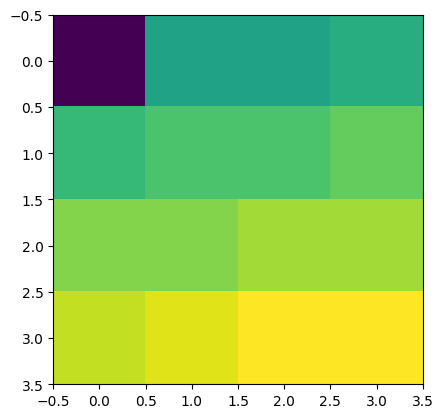

In [6]:
sqr = int(math.sqrt(ITEM_SIZE))
# print(sqr, ITEM_SIZE)
# print(df.loc[10][0])
sample = np.array( json.loads(df.loc[3][0]) , dtype=np.int32 )
# print(type(sample))
plt.imshow(np.reshape(sample, (-1,sqr)))
plt.show()

In [7]:
midichar.decode_midi(notes=sample,
                     out_file="output/batch.mid",
                     instrument_name="Standard Kit")